In [42]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [15]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=6, random_state=42)

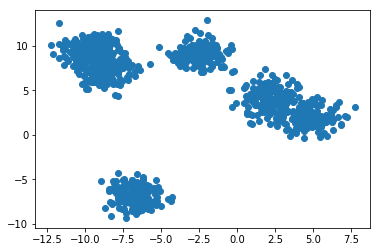

In [18]:
plt.scatter(X[:, 0], X[:, 1])

In [19]:
from sklearn.cluster import KMeans

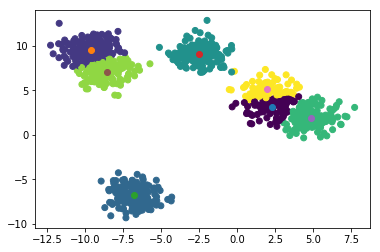

In [36]:
model = KMeans(7)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1])

In [28]:
model.cluster_centers_

array([[ 3.31844751,  3.11782118],
       [-6.8114166 , -6.75205916],
       [-6.99232891,  8.63957864]])

In [55]:
class CustomKMeans:
    
    def __init__(self, n_clusters, n_init=10, max_iter=20):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        
    def fit(self, X):
        self.X = X
        
        
        
        clusters = []
        for i in range(self.n_clusters):
            clusters.append(Cluster(random.choice(X)))
            
        for iter in range(self.max_iter):
            
            lables = []
            
            for point in X:
                
                distances = []
                for cluster in clusters:
                    distance = cluster.distance(point)
                    distances.append((distance, cluster))
                
                best_index = np.array(distances)[:, 0].argmin()
                best_cluster = distances[best_index][1]
                
                best_cluster.points.append(point)
                lables.append(best_index)
            
            
            for cluster in clusters:
                cluster.reset_center()
            
        
        self.lables = lables
        self.clusters = clusters
        

class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def reset_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sum((self.center - point)**2)
        
        

In [56]:
m2 = CustomKMeans(6)

In [57]:
m2.fit(X)

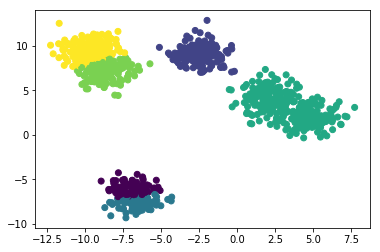

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=m2.lables)

